In [1]:
import time

#### Setup Data into pickle files after cleaning and tokenizing them - for article text and headlines

In [2]:
start = time.time()
%run data_setup.py
print("Time:",time.time()-start)

Time: 12.151057004928589


#### Load Data from pickle files

In [3]:
import pickle
FN0 = 'bodies'
FN1 = 'headlines'
with open('data/%s.pkl'%FN0, 'rb') as fp:
    bodies = pickle.load(fp)
    print(len(bodies))
with open('data/%s.pkl'%FN1, 'rb') as fp:
    headlines = pickle.load(fp)
    print(len(headlines))

241
241


In [4]:
headlines[0]

['lyft', 'riders', 'able', 'hail', 'semiautonomous', 'car', 'end', '2017']

In [5]:
bodies[0]

['lyft',
 'riders',
 'able',
 'hail',
 'semiautonomous',
 'car',
 'bay',
 'area',
 'end',
 '2017',
 'lyft',
 'adding',
 'another',
 'selfdriving',
 'startup',
 'roster',
 'software',
 'companies',
 '’',
 'working',
 'ridehail',
 'company',
 'working',
 'driveai',
 'bring',
 'semiautonomous',
 'cars',
 'bay',
 'area',
 'end',
 'year',
 'lyft',
 'riders',
 'able',
 'summon',
 'car',
 'drives',
 'part',
 'time',
 'driver',
 'still',
 'present',
 'take',
 'situations',
 'software',
 '’',
 'properly',
 'read',
 'terrain',
 'presence',
 'pedestrians',
 'experience',
 '’',
 'significantly',
 'different',
 'customer',
 'lyft',
 'chief',
 'competitor',
 'uber',
 'testing',
 'semiautonomous',
 'vehicles',
 'effort',
 'eventually',
 'deploy',
 'cars',
 'without',
 'drivers',
 'vehicles',
 'could',
 'operate',
 'nearly',
 'continuously',
 '’',
 'require',
 'company',
 'split',
 'fares',
 'driver',
 'driveai',
 'recently',
 'raised',
 '50',
 'million',
 'backed',
 'ggv',
 'capital',
 'fourth',
 'au

#### Make Word Embeddings from Glove

In [6]:
from glove_word2vec_convert import convert
for dim in [50, 100, 200, 300]:
    start = time.time()
    convert(dim)
    print("Time:",time.time() - start)

Using TensorFlow backend.


[('zealand', 0.9207794666290283), ('australian', 0.8780614137649536), ('britain', 0.8478988409042358), ('africa', 0.8332696557044983), ('england', 0.8085249066352844), ('united', 0.8037459254264832), ('canada', 0.7994688749313354), ('south', 0.7845567464828491), ('scotland', 0.7658649682998657), ('wales', 0.7653419971466064)]
0.886033768342
Time: 18.041852951049805
[('zealand', 0.9042124152183533), ('england', 0.7858783006668091), ('australian', 0.7696144580841064), ('britain', 0.7670673131942749), ('canada', 0.7569618821144104), ('africa', 0.7522280812263489), ('scotland', 0.7264115214347839), ('wales', 0.7209108471870422), ('india', 0.704209566116333), ('indies', 0.6983798146247864)]
0.832349418276
Time: 32.54984784126282
[('zealand', 0.80061274766922), ('australian', 0.7617150545120239), ('canada', 0.6340054273605347), ('sydney', 0.6331798434257507), ('britain', 0.6271337866783142), ('queensland', 0.6240568161010742), ('england', 0.6210855841636658), ('melbourne', 0.6138824224472046

#### Run Model - for glove embeddings 50, 100, 200 and 300 dimensions

In [ ]:
time_in_secs = []

In [9]:
start = time.time()
%run model.py 50
tsecs = time.time()-start
print("Time:",tsecs)
time_in_secs.append(tsecs)

Using TensorFlow backend.
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:41: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  weights=[embedding_weights], dropout=0.5)(bodies)
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:42: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(1024, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)`
  layer = GRU(1024, return_sequences=True, dropout_W=0.5, dropout_U=0.5)(embeddings)
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:43: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(1024, return_sequences=False, dropout=0.5, recurrent_dropout=0.5)`
  layer = GRU(1024, return_sequences=False, dropout_W=0.5, dropout_U=0.5)(layer)
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:46: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs

Train on 977 samples, validate on 109 samples
Epoch 1/50
977/977 [==============================] - 260s - loss: 10.1776 - val_loss: 10.1275
Epoch 2/50
977/977 [==============================] - 104s - loss: 7.2554 - val_loss: 9.9645
Epoch 3/50
977/977 [==============================] - 97s - loss: 6.6053 - val_loss: 10.3346
Epoch 4/50
977/977 [==============================] - 102s - loss: 6.3197 - val_loss: 10.6106
Epoch 5/50
977/977 [==============================] - 100s - loss: 6.0825 - val_loss: 10.8254
Epoch 6/50
977/977 [==============================] - 104s - loss: 5.8247 - val_loss: 11.0068
Epoch 7/50
977/977 [==============================] - 123s - loss: 5.5456 - val_loss: 10.9210
Epoch 8/50
977/977 [==============================] - 103s - loss: 5.2715 - val_loss: 11.0052
Time: 1023.3650629520416


In [10]:
start = time.time()
%run model.py 100
tsecs = time.time()-start
print("Time:",tsecs)
time_in_secs.append(tsecs)

/Users/jc/gU/DSCI-6004-student/hackernews/model.py:41: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  weights=[embedding_weights], dropout=0.5)(bodies)
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:42: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(1024, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)`
  layer = GRU(1024, return_sequences=True, dropout_W=0.5, dropout_U=0.5)(embeddings)
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:43: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(1024, return_sequences=False, dropout=0.5, recurrent_dropout=0.5)`
  layer = GRU(1024, return_sequences=False, dropout_W=0.5, dropout_U=0.5)(layer)
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:46: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  model =

Train on 977 samples, validate on 109 samples
Epoch 1/50
977/977 [==============================] - 102s - loss: 9.6968 - val_loss: 8.5896
Epoch 2/50
977/977 [==============================] - 106s - loss: 6.6810 - val_loss: 9.3631
Epoch 3/50
977/977 [==============================] - 102s - loss: 6.4104 - val_loss: 9.5452
Epoch 4/50
977/977 [==============================] - 91s - loss: 6.2494 - val_loss: 9.9169
Epoch 5/50
977/977 [==============================] - 91s - loss: 6.0932 - val_loss: 10.1816
Epoch 6/50
977/977 [==============================] - 92s - loss: 5.9368 - val_loss: 10.3147
Epoch 7/50
977/977 [==============================] - 95s - loss: 5.7280 - val_loss: 10.3787
Time: 720.7059531211853


In [11]:
start = time.time()
%run model.py 200
tsecs = time.time()-start
print("Time:",tsecs)
time_in_secs.append(tsecs)

/Users/jc/gU/DSCI-6004-student/hackernews/model.py:41: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  weights=[embedding_weights], dropout=0.5)(bodies)
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:42: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(1024, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)`
  layer = GRU(1024, return_sequences=True, dropout_W=0.5, dropout_U=0.5)(embeddings)
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:43: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(1024, return_sequences=False, dropout=0.5, recurrent_dropout=0.5)`
  layer = GRU(1024, return_sequences=False, dropout_W=0.5, dropout_U=0.5)(layer)
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:46: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  model =

Train on 977 samples, validate on 109 samples
Epoch 1/50
977/977 [==============================] - 253s - loss: 9.7048 - val_loss: 8.9019
Epoch 2/50
977/977 [==============================] - 106s - loss: 6.8443 - val_loss: 9.4263
Epoch 3/50
977/977 [==============================] - 109s - loss: 6.0257 - val_loss: 9.6998
Epoch 4/50
977/977 [==============================] - 111s - loss: 5.6483 - val_loss: 10.1359
Epoch 5/50
977/977 [==============================] - 111s - loss: 5.3835 - val_loss: 10.5642
Epoch 6/50
977/977 [==============================] - 106s - loss: 5.2230 - val_loss: 10.2800
Epoch 7/50
977/977 [==============================] - 112s - loss: 5.0038 - val_loss: 10.2851
Time: 976.8387160301208


In [12]:
start = time.time()
%run model.py 300
tsecs = time.time()-start
print("Time:",tsecs)
time_in_secs.append(tsecs)

/Users/jc/gU/DSCI-6004-student/hackernews/model.py:41: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  weights=[embedding_weights], dropout=0.5)(bodies)
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:42: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(1024, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)`
  layer = GRU(1024, return_sequences=True, dropout_W=0.5, dropout_U=0.5)(embeddings)
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:43: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(1024, return_sequences=False, dropout=0.5, recurrent_dropout=0.5)`
  layer = GRU(1024, return_sequences=False, dropout_W=0.5, dropout_U=0.5)(layer)
/Users/jc/gU/DSCI-6004-student/hackernews/model.py:46: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  model =

Train on 977 samples, validate on 109 samples
Epoch 1/50
977/977 [==============================] - 310s - loss: 9.9826 - val_loss: 8.8127
Epoch 2/50
977/977 [==============================] - 107s - loss: 6.7610 - val_loss: 9.3869
Epoch 3/50
977/977 [==============================] - 239s - loss: 6.6389 - val_loss: 10.2881
Epoch 4/50
977/977 [==============================] - 121s - loss: 6.4660 - val_loss: 9.8158
Epoch 5/50
977/977 [==============================] - 109s - loss: 5.7885 - val_loss: 9.9366
Epoch 6/50
977/977 [==============================] - 115s - loss: 5.5631 - val_loss: 10.2726
Epoch 7/50
977/977 [==============================] - 119s - loss: 5.1913 - val_loss: 10.4451
Time: 1231.8864741325378


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_model_perf(embed_dim=50):    
    files = ['data/losses/glove_{}_train.txt'.format(embed_dim), 'data/losses/glove_{}_test.txt'.format(embed_dim)]    
    plt.figure(figsize=(8, 8))
    for file in files:
        losses = []
        with open(file, 'r') as f: 
            for lines in f:
                lines = lines.rstrip('\n')
                losses.append(float(lines))                
            plt.plot(losses)
            
    plt.title('Model loss - Embed Dim {}'.format(embed_dim))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()              

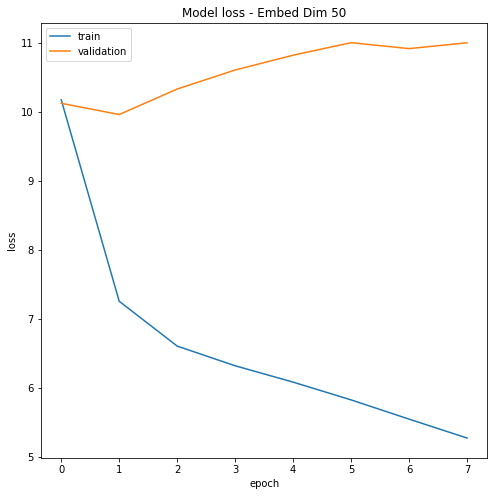

In [26]:
plot_model_perf(50)

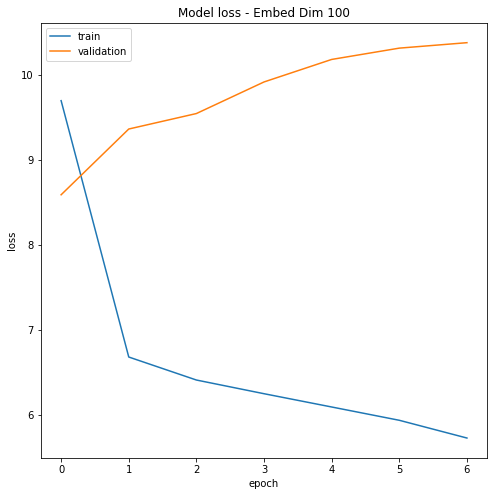

In [27]:
plot_model_perf(100)

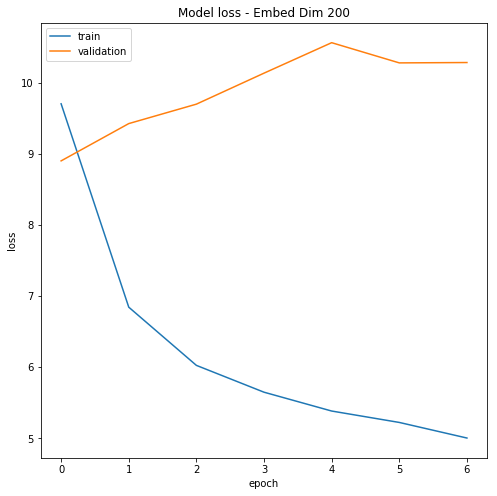

In [29]:
plot_model_perf(200)

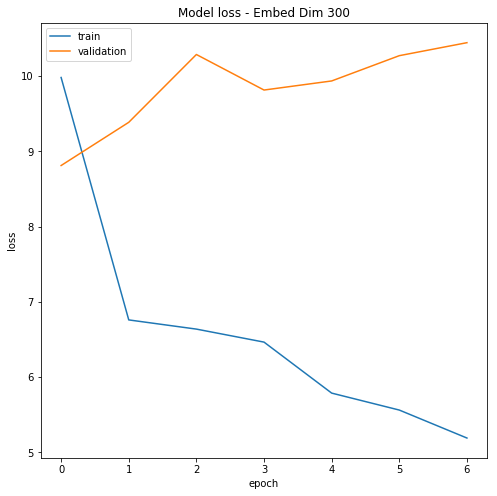

In [30]:
plot_model_perf(300)

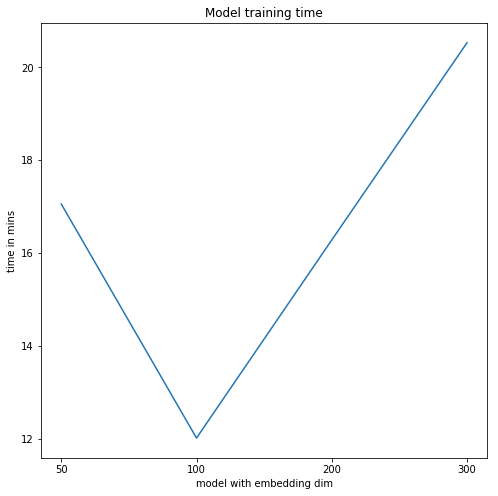

In [35]:
time_in_secs = [1023.3650629520416, 720.7059531211853, 976.8387160301208, 1231.8864741325378]
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot([t/60 for t in time_in_secs])
plt.title('Model training time')
plt.ylabel('time in mins')
plt.xlabel('model with embedding dim')
plt.xticks( range(4), ('50', '100', '200', '300') )
plt.show()              